In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Practical One**

In [ ]:
import os

# URL of the dataset
#url = "https://files.grouplens.org/datasets/movielens/ml-32m.zip"
url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
zip_file = "ml-latest-small.zip"
extract_folder = "ml-latest-small"

print(f"Starting download of {url}...")

# Use !wget to download the file in Colab
# -q makes it quiet (less output)
!wget -q $url

print("Download complete.")

# Check if the file was downloaded successfully
if os.path.exists(zip_file):
    print(f"Successfully downloaded {zip_file}.")

    # Unzip the file
    print(f"Unzipping {zip_file}...")
    # -o overwrites existing files without asking
    # -d specifies the directory to extract to
    !unzip -o $zip_file -d $extract_folder

    print(f"Successfully unzipped to '{extract_folder}' folder.")

    # List the contents of the extracted folder
    print(f"\nContents of {extract_folder}:")
    !ls -l $extract_folder

    # Optional: Clean up the zip file after extraction
    # print(f"Cleaning up {zip_file}...")
    # os.remove(zip_file)
    # print("Zip file removed.")
else:
    print(f"Error: {zip_file} was not downloaded.")

Starting download of https://files.grouplens.org/datasets/movielens/ml-latest-small.zip...
Download complete.
Successfully downloaded ml-latest-small.zip.
Unzipping ml-latest-small.zip...
Archive:  ml-latest-small.zip
   creating: ml-latest-small/ml-latest-small/
  inflating: ml-latest-small/ml-latest-small/links.csv  
  inflating: ml-latest-small/ml-latest-small/tags.csv  
  inflating: ml-latest-small/ml-latest-small/ratings.csv  
  inflating: ml-latest-small/ml-latest-small/README.txt  
  inflating: ml-latest-small/ml-latest-small/movies.csv  
Successfully unzipped to 'ml-latest-small' folder.

Contents of ml-latest-small:
total 4
drwxr-xr-x 2 root root 4096 Sep 26  2018 ml-latest-small


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/ml-latest-small/ml-latest-small/ratings.csv')

In [ ]:
data

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
userId_to_idx = {}
idx_to_userId = []

In [ ]:
movieId_to_idx = {}
index_to_movieId = []
SparseMatrixBycolumn = []

In [ ]:
userIdx = 0
movieIdx = 0

In [ ]:
import csv
file_path = '/content/ml-latest-small/ml-latest-small/ratings.csv'
with open(file_path, 'r', newline='') as file:

    reader = csv.reader(file, delimiter=',')
    next(reader) # Skip the header row

    for row in reader:
      userId, movieId, rating, _ = int(row[0]), int(row[1]), float(row[2]), int(row[3])
      if not userId in userId_to_idx.keys() :
        userId_to_idx[userId] = userIdx
        idx_to_userId.append(userId)
        userIdx+=1

      if not movieId in  movieId_to_idx.keys():
        movieId_to_idx[movieId] = movieIdx
        index_to_movieId.append(movieId)
        movieIdx+=1

In [ ]:
SparseMatrixByRow = [[] for _ in range(len(userId_to_idx))]
SparseMatrixByColumn = [[] for _ in range(len(movieId_to_idx))]

In [ ]:
data_by_user_train = [[] for _ in range(len(userId_to_idx))]
data_by_user_test = [[] for _ in range(len(userId_to_idx))]

data_by_movie_train = [[] for _ in range(len(movieId_to_idx))]
data_by_movie_test = [[] for _ in range(len(movieId_to_idx))]

In [ ]:
R = np.zeros((len(userId_to_idx), len(movieId_to_idx)))

In [ ]:
with open(file_path, 'r', newline='') as file:
  reader = csv.reader(file, delimiter = ',')
  next(reader)
  for row in reader:
    userId, movieId, rating, _ = int(row[0]), int(row[1]), float(row[2]), int(row[3])

    userIdIdx = userId_to_idx[userId]
    movieIdIdx = movieId_to_idx[movieId]

    SparseMatrixByRow[userIdIdx].append((movieIdIdx, rating))
    SparseMatrixByColumn[movieIdIdx].append((userIdIdx, rating))


    if np.random.random() <= 0.9:
      data_by_user_train[userIdIdx].append((movieIdIdx, rating))
      data_by_movie_train[movieIdIdx].append((userIdIdx, rating))
      #R[userIdIdx][movieIdIdx] = rating
    else:
      data_by_user_test[userIdIdx].append((movieIdIdx, rating))
      data_by_movie_test[movieIdIdx].append((userIdIdx, rating))





In [ ]:
len(SparseMatrixByColumn[56])

40

In [ ]:
for m in range(len(data_by_user_train)):
  for n in range(len(data_by_user_train[m])):
    R[m][n] = data_by_user_train[m][n][1]

In [ ]:
data_by_user_train[100][2][1]

3.0

In [ ]:
R[100][2]

np.float64(3.0)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def get_rated_movies_ids_for_user(userId):
  userIdx = userId_to_idx[userId]
  return SparseMatrixByRow[userIdx]


def get_users_by_movie_id(movieId):
  movieIdx = movieId_to_idx[movieId]
  return SparseMatrixByColumn[movieIdx]

In [ ]:
degrees_of_users = {}

In [ ]:
for userId in userId_to_idx.keys():
  user_movies = get_rated_movies_ids_for_user(userId)
  degree = len(user_movies)

  if degree in degrees_of_users.keys():
    degrees_of_users[degree] += 1
  else:
    degrees_of_users[degree] = 1

In [ ]:
degrees_of_movies = {}

In [ ]:
for movieId in movieId_to_idx.keys():
  movie_users = get_users_by_movie_id(movieId)
  degree = len(movie_users)

  if degree in degrees_of_movies.keys():
    degrees_of_movies[degree] += 1
  else:
    degrees_of_movies[degree] = 1

In [ ]:
# Create scatter plot
users_degress = list(degrees_of_users.keys())
users_degress_frequencies = list(degrees_of_users.values())

movies_degrees = list(degrees_of_movies.keys())
movies_degress_frequencies = list(degrees_of_movies.values())


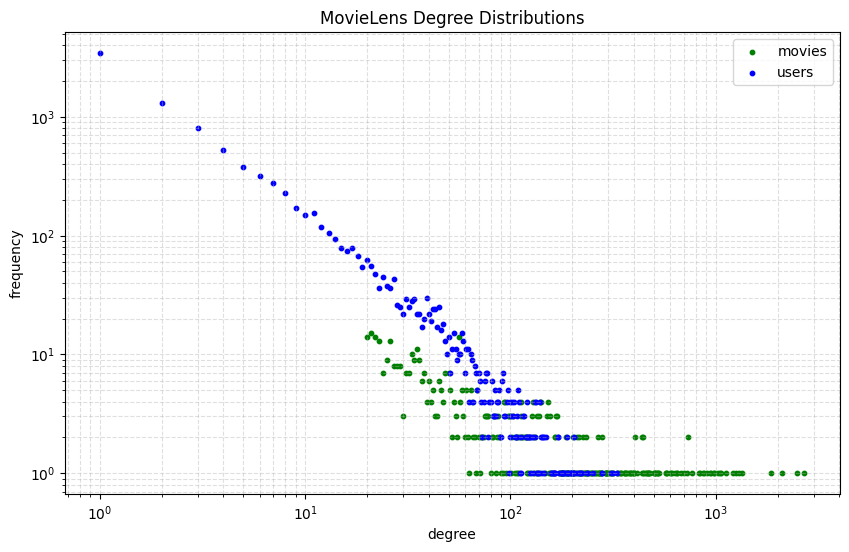

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(users_degress, users_degress_frequencies, s=10, color='green', label='movies')
plt.scatter(movies_degrees, movies_degress_frequencies, s=10, color='blue', label='users')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.legend()
plt.title('MovieLens Degree Distributions')
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()

## *Are there power laws in the data? Is it scale-free?*


The data distribution appears to follow a power-law pattern. Both lines are nearly straight, indicating that the network is scale-free. This means it lacks a characteristic degree, and scaling the data by any constant factor would not alter the shape of the distribution—it would only rescale it.


# **Practical Two**

## **Initialization**

In [ ]:
num_users = len(data_by_user_train)
num_movies = len(data_by_movie_train)
lam = 0.5
gamma = 5
lr = 0.001
num_iters = 50

In [ ]:
biases_users = np.zeros(num_users)
biases_movies = np.zeros(num_movies)

In [ ]:
loss_function_train = []
loss_function_test = []
RMSE_train = []
RMSE_test = []

## **Defining loss functions**

In [ ]:
def compute_loss(data, user_biases, item_biases, mu, gamma):
    loss = 0.0
    # Flatten all ratings into arrays
    users = []
    items = []
    ratings = []
    for m in range(len(data)):
        for n, r in data[m]:
            users.append(m)
            items.append(n)
            ratings.append(r)

    users = np.array(users)
    items = np.array(items)
    ratings = np.array(ratings)

    # Predicted ratings
    preds = mu + user_biases[users] + item_biases[items]

    # Squared error
    loss = np.sum((ratings - preds) ** 2)

    # Regularization
    loss += gamma * (np.sum(user_biases ** 2) + np.sum(item_biases ** 2))
    return loss


In [ ]:
def compute_rmse(data, user_biases, item_biases, mu):
    # Flatten all ratings into arrays
    users = []
    items = []
    ratings = []
    for m in range(len(data)):
        for n, r in data[m]:
            users.append(m)
            items.append(n)
            ratings.append(r)

    users = np.array(users)
    items = np.array(items)
    ratings = np.array(ratings)

    # Predicted ratings
    preds = mu + user_biases[users] + item_biases[items]

    # RMSE
    rmse = np.sqrt(np.mean((ratings - preds) ** 2))
    return rmse

## **Training loop**

In [ ]:
mu = np.mean([r for user_ratings in data_by_user_train for _, r in user_ratings]) # Global Rating

In [ ]:
for iter in range(num_iters):
    # Update user biases
    for m in range(num_users):
        ratings = data_by_user_train[m]
        bias = 0
        item_counter = 0
        for n, r in ratings:
            b_movie = biases_movies[n]
            bias += lam * (r - b_movie)
            item_counter += 1
        if item_counter > 0:
            biases_users[m] = bias / (lam * item_counter + gamma)

    # Update movie biases
    for n in range(num_movies):
        ratings = data_by_movie_train[n]
        bias = 0
        user_counter = 0
        for m, r in ratings:
            b_user = biases_users[m]
            bias += lam * (r - b_user)
            user_counter += 1
        if user_counter > 0:
            biases_movies[n] = bias / (lam * user_counter + gamma)

    # Compute losses and RMSE (optional: every few iterations)
    train_loss = compute_loss(data_by_user_train, biases_users, biases_movies, mu, gamma)
    test_loss = compute_loss(data_by_user_test, biases_users, biases_movies, mu, gamma)

    train_rmse = compute_rmse(data_by_user_train, biases_users, biases_movies, mu)
    test_rmse = compute_rmse(data_by_user_test, biases_users, biases_movies, mu)

    loss_function_train.append(train_loss)
    loss_function_test.append(test_loss)

    RMSE_train.append(train_rmse)
    RMSE_test.append(test_rmse)


## **Train and Test Losses over the number of iterations**

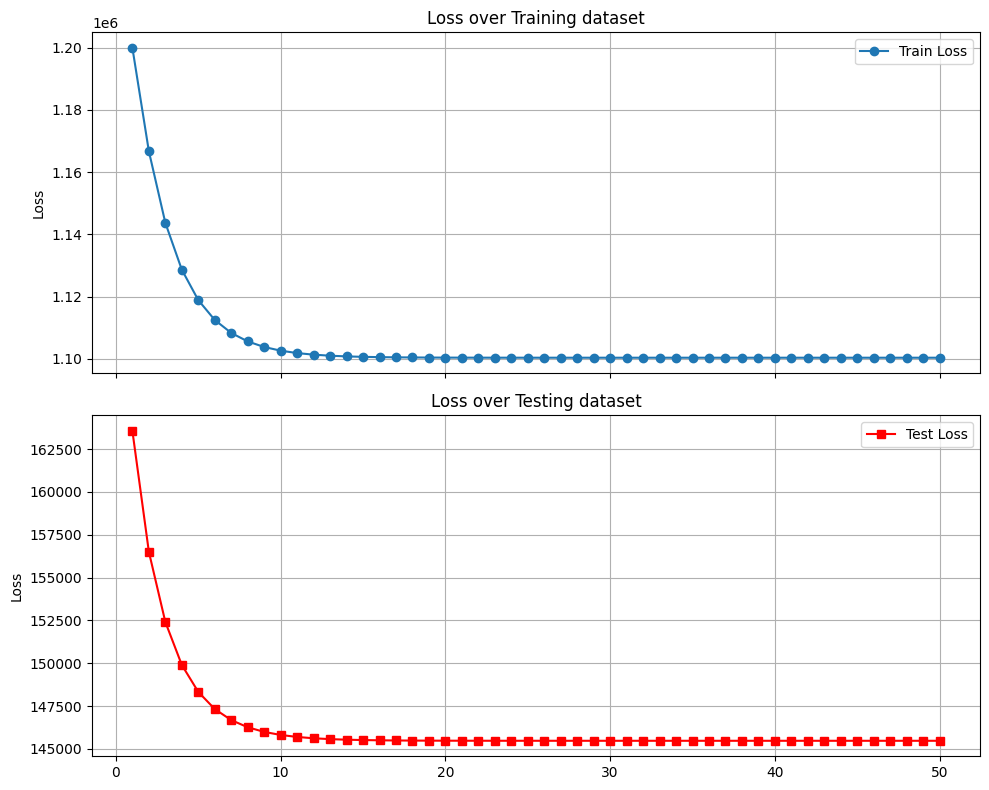

In [ ]:
iterations = range(1, len(loss_function_train) + 1)
iterations1 = range(1, len(loss_function_test) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations, loss_function_train, marker='o', label='Train Loss')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Training dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations1, loss_function_test, marker='s', color='red', label='Test Loss')
ax2.set_ylabel('Loss')
ax2.set_title('Loss over Testing dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

## **Train and Test Root Mean Square Errors over the number of iterations**

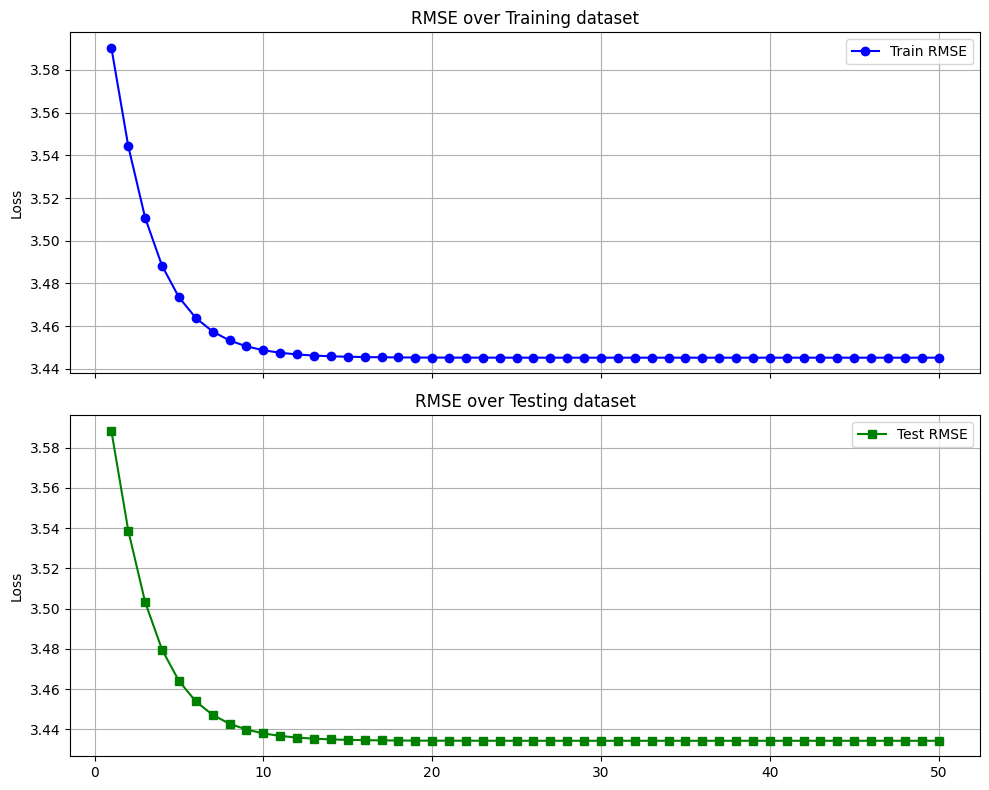

In [ ]:
iterations2 = range(1, len(RMSE_train) + 1)
iterations3 = range(1, len(RMSE_test) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations2, RMSE_train, marker='o', color='blue', label='Train RMSE')
ax1.set_ylabel('Loss')
ax1.set_title('RMSE over Training dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations3, RMSE_test, marker='s', color='green', label='Test RMSE')
ax2.set_ylabel('Loss')
ax2.set_title('RMSE over Testing dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

# **Practical Three**

## **Initialization**

In [ ]:
num_users = len(data_by_user_train)
num_movies = len(data_by_movie_train)

k = 10 # Latent dimensions

# U = np.random.normal(scale = 1, size= (num_users, K))
# V = np.random.normal(scale = 1, size= (num_movies, K))

# biases_users = np.zeros(num_users)
# biases_movies = np.zeros(num_movies)

In [ ]:
# lam = 0.5
# gamma = 0.5
# tau = 10
num_iters = 12

In [ ]:
loss_history_train = []
loss_history_test = []

RMSE_train_history = []
RMSE_test_history = []

## **Defining loss functions**

In [ ]:
def compute_loss_(data_user, N, user_biases, item_biases, lam, tau, gamma, U_val, V_val):
    loss = 0.0
    reg_user = 0
    reg_item = 0
    error_squared = 0
    num_ratings = 0
    for m in range(len(data_user)):
        for n, r in data_user[m]:
          # Ensure U_val and V_val are indexed correctly
          pred = user_biases[m] + item_biases[n] + U_val[m] @ V_val[n]
          error_squared+= (r - pred) ** 2
          num_ratings+=1
        reg_user+= np.dot(U_val[m], U_val[m])
    for n in range(N):
        reg_item+= np.dot(V_val[n], V_val[n])

    if num_ratings == 0:
        # If no ratings, only regularization terms contribute to loss
        return 0.5 * tau * reg_user + 0.5 * tau * reg_item + 0.5 * gamma * (np.sum(user_biases ** 2) + np.sum(item_biases ** 2))

    loss = 0.5 * lam * error_squared + 0.5 * tau * reg_user + 0.5 * tau * reg_item + 0.5 * gamma * (np.sum(user_biases ** 2) + np.sum(item_biases ** 2))
    return loss

In [ ]:
def compute_RMSE_(data_user, user_biases, item_biases, U_val, V_val):
  error_squared = 0
  count = 0
  for m in range(len(data_user)):
    for n, r in data_user[m]:
      # Ensure U_val and V_val are indexed correctly
      pred = user_biases[m] +  item_biases[n] + U_val[m] @ V_val[n]
      error_squared+= (r - pred) **2
      count+=1
  if count == 0:
      return 0.0 # Return 0 if there are no ratings to avoid division by zero
  rmse = np.sqrt(error_squared / count)
  return rmse

## **Training Loop**

In [ ]:
import random
from itertools import product

In [ ]:
def train_ALS(data_by_user_train_fold, data_by_movie_train_fold, num_users, num_movies, k, lam, tau, gamma, num_iters):
  U = np.random.normal(scale = 1, size= (num_users, k))
  V = np.random.normal(scale = 1, size= (num_movies, k))

  biases_users = np.zeros(num_users)
  biases_movies = np.zeros(num_movies)

  for iter_count in range(num_iters):
    # Update user biases and user embeddings
    for m in range(num_users):
        ratings = data_by_user_train_fold[m]
        if not ratings: # Skip if no ratings for this user in this fold
            continue
        bias = 0
        item_counter = 0

        for n, r in ratings:
            # Corrected: predict using current U, V, and biases_movies
            pred = U[m] @ V[n] + biases_movies[n]
            bias += lam * (r - pred)
            item_counter += 1
        if item_counter > 0:
            biases_users[m] = bias / (lam * item_counter + gamma)

        numerator = np.zeros(k)
        denominator = tau * np.eye(k)

        for n, r in ratings:
          numerator+= lam * (r - biases_movies[n] - biases_users[m]) * V[n]
          denominator+= lam * np.outer(V[n], V[n])
        try:
            U[m] = np.linalg.solve(denominator, numerator)
        except np.linalg.LinAlgError:
            # Handle singular matrix if it occurs, e.g., by skipping update
            print(f"Warning: Singular matrix encountered for U[{m}] update in iteration {iter_count}. Skipping update.")
            pass


    # Update movie biases and movie embeddings
    for n in range(num_movies):
        ratings = data_by_movie_train_fold[n]
        if not ratings: # Skip if no ratings for this movie in this fold
            continue
        bias = 0
        user_counter = 0

        for m_user, r in ratings: # `m` changed to `m_user` to avoid name conflict
            # Corrected: predict using current U, V, and biases_users
            pred = U[m_user] @ V[n] + biases_users[m_user]
            bias += lam * (r - pred)
            user_counter += 1
        if user_counter > 0:
            biases_movies[n] = bias / (lam * user_counter + gamma)

        numerator = np.zeros(k)
        denominator = tau * np.eye(k)

        for m_user, r in ratings: # `m` changed to `m_user`
          numerator+= lam * (r - biases_movies[n] - biases_users[m_user]) * U[m_user]
          denominator+= lam * np.outer(U[m_user], U[m_user])
        try:
            V[n] = np.linalg.solve(denominator, numerator)
        except np.linalg.LinAlgError:
            # Handle singular matrix if it occurs
            print(f"Warning: Singular matrix encountered for V[{n}] update in iteration {iter_count}. Skipping update.")
            pass
    train_loss = compute_loss_(data_by_user_train, num_movies, biases_users, biases_movies, lam, tau, gamma, U, V)
    test_loss = compute_loss_(data_by_user_train, num_movies, biases_users, biases_movies, lam, tau, gamma, U, V)

    train_rmse = compute_RMSE_(data_by_user_train, biases_users, biases_movies, U, V)
    test_rmse = compute_RMSE_(data_by_user_test, biases_users, biases_movies, U, V)

    loss_history_train.append(train_loss)
    loss_history_test.append(test_loss)

    RMSE_train_history.append(train_rmse)
    RMSE_test_history.append(test_rmse)


    if (iter_count) % 5 == 0:
       print(f'Iteration: {iter_count} | Train loss: {train_loss} | Test loss: {test_loss} | RMSE_train:{train_rmse} | RMSE_test:{test_rmse}')

  return U, V, biases_users, biases_movies

In [ ]:
def als_cross_validate(data_by_user_train_full, data_by_movie_train_full, num_users, num_movies, K_folds, k_latent, lam, tau, gamma, num_iters):
  # 1. Extract all ratings into triplets (user_idx, movie_idx, rating)
  all_ratings_triplets = []
  for u_idx in range(num_users):
    for m_idx, rating in data_by_user_train_full[u_idx]:
      all_ratings_triplets.append((u_idx, m_idx, rating))

  # 2. Shuffle and split these triplets into K_folds
  random.shuffle(all_ratings_triplets)
  rating_fold_size = len(all_ratings_triplets) // K_folds
  rating_folds = [all_ratings_triplets[i*rating_fold_size:(i+1)*rating_fold_size] for i in range(K_folds)]

  fold_scores = []

  for val_index in range(K_folds):
    # Construct training and validation sets for the current fold
    val_triplets = rating_folds[val_index]
    train_triplets = []
    for j in range(K_folds):
      if j != val_index:
        train_triplets.extend(rating_folds[j])

    # Reconstruct data_by_user_train_fold and data_by_movie_train_fold from triplets
    # These structures must maintain num_users and num_movies length for consistent indexing
    current_train_data_by_user = [[] for _ in range(num_users)]
    current_train_data_by_movie = [[] for _ in range(num_movies)]
    for u, m, r in train_triplets:
      current_train_data_by_user[u].append((m, r))
      current_train_data_by_movie[m].append((u, r))

    current_val_data_by_user = [[] for _ in range(num_users)]
    for u, m, r in val_triplets:
      current_val_data_by_user[u].append((m, r))

    # Call train_ALS with the data specific to this fold
    U_trained, V_trained, bu_trained, bm_trained = train_ALS(
        current_train_data_by_user,
        current_train_data_by_movie,
        num_users, num_movies, k_latent, lam, tau, gamma, num_iters
    )
    # Compute RMSE on the validation set for this fold
    rmse = compute_RMSE_(current_val_data_by_user, bu_trained, bm_trained, U_trained, V_trained)
    fold_scores.append(rmse)
    print(f"Fold {val_index+1} RMSE: {rmse}")

  return np.mean(fold_scores)

In [ ]:
def grid_search_ALS(data_by_user_train, data_by_movie_train, num_users, num_movies, param_grid, k_unused, K=3, num_iters=15):
  keys = list(param_grid.keys())
  values = list(param_grid.values())

  best_score = float('inf')
  best_params = None
  all_results = []

  for combo in product(*values):

    params = dict(zip(keys, combo))
    print("Testing combinations: ", params)

    # Corrected: pass tau=params['tau'] instead of tau=params['lam']
    score = als_cross_validate(data_by_user_train, data_by_movie_train, num_users, num_movies, K, k_latent = params['k'], lam=params['lam'], tau=params['tau'], gamma=params['gamma'], num_iters=num_iters)
    print("Mean 3-CV RMSE: ", score)
    all_results.append((params, score))

    if score < best_score:
      best_score = score
      best_params = params

  return best_params, best_score, all_results

In [ ]:
param_grid = {
    'k': [10, 20, 30],
    'lam' : [0.1, 0.5, 1],
    'tau' : [5, 10, 15],
    'gamma' : [0.2, 0.5, 0.7]
}

In [ ]:
best_params, best_score, results = grid_search_ALS(data_by_user_train, data_by_movie_train, num_users, num_movies, param_grid, k, K=3, num_iters=15)

Testing combinations:  {'k': 10, 'lam': 0.1, 'tau': 5, 'gamma': 0.2}
Iteration: 0 | Train loss: 44944.71989016267 | Test loss: 44944.71989016267 | RMSE_train:0.8866071075499115 | RMSE_test:0.9341993133491564
Iteration: 5 | Train loss: 44256.65061076608 | Test loss: 44256.65061076608 | RMSE_train:0.8258292605268881 | RMSE_test:0.8807544761951654
Iteration: 10 | Train loss: 44243.36628574254 | Test loss: 44243.36628574254 | RMSE_train:0.8277735469793894 | RMSE_test:0.8834186563651035
Fold 1 RMSE: 0.8801085343045377
Iteration: 0 | Train loss: 45917.2411946423 | Test loss: 45917.2411946423 | RMSE_train:0.8812449595936902 | RMSE_test:0.9337539225152
Iteration: 5 | Train loss: 45283.25237637158 | Test loss: 45283.25237637158 | RMSE_train:0.8251050742095459 | RMSE_test:0.8773735404325751
Iteration: 10 | Train loss: 45271.13830843826 | Test loss: 45271.13830843826 | RMSE_train:0.8271174058712293 | RMSE_test:0.8800517918000622
Fold 2 RMSE: 0.8838763754178746
Iteration: 0 | Train loss: 46261.954

In [ ]:
best_params, best_score

({'k': 10, 'lam': 0.1, 'tau': 10, 'gamma': 0.2},
 np.float64(0.8788724940451509))

In [ ]:
U_trained, V_trained, bu, bm =train_ALS(data_by_user_train, data_by_movie_train, num_users, num_movies, k=best_params['k'], lam=best_params['lam'], tau=best_params['tau'], gamma=best_params['gamma'], num_iters=12)

Iteration: 0 | Train loss: 23999.049798444204 | Test loss: 23999.049798444204 | RMSE_train:0.849247854525159 | RMSE_test:0.9183316820635746
Iteration: 0 | Train loss: 23999.049798444204 | Test loss: 23999.049798444204 | RMSE_train:0.849247854525159 | RMSE_test:0.9183316820635746
Iteration: 5 | Train loss: 23485.881127789315 | Test loss: 23485.881127789315 | RMSE_train:0.8032040851352836 | RMSE_test:0.8713707714938559
Iteration: 10 | Train loss: 23461.23407639903 | Test loss: 23461.23407639903 | RMSE_train:0.8040268049202219 | RMSE_test:0.8723704179278747


In [ ]:
for iter in range(num_iters):
  # Update user biases and user embeddings
    for m in range(num_users):
        ratings = data_by_user_train[m]
        bias = 0
        item_counter = 0

        for n, r in ratings:
            pred = U[m] @ V[n] + biases_movies[n]
            bias += lam * (r - pred)
            item_counter += 1
        if item_counter > 0:
            biases_users[m] = bias / (lam * item_counter + gamma)

        numerator = np.zeros(K)
        denominator = tau * np.eye(K)

        for n, r in ratings:
          numerator+= lam * (r - biases_movies[n] - biases_users[m]) * V[n]
          denominator+= lam * np.outer(V[n], V[n])
        U[m] = np.linalg.solve(denominator, numerator)

    # Update movie biases and movie embeddings
    for n in range(num_movies):
        ratings = data_by_movie_train[n]
        bias = 0
        user_counter = 0

        for m, r in ratings:
            b_user = biases_users[m]
            bias += lam * (r - b_user)
            user_counter += 1
        if user_counter > 0:
            biases_movies[n] = bias / (lam * user_counter + gamma)

        numerator = np.zeros(K)
        denominator = tau * np.eye(K)

        for m, r in ratings:
          numerator+= lam * (r - biases_movies[n] - biases_users[m]) * U[m]
          denominator+= lam * np.outer(U[m], U[m])
        V[n] = np.linalg.solve(denominator, numerator)

    train_loss = compute_loss_(data_by_user_train, num_movies, biases_users, biases_movies, lam, tau, gamma)
    test_loss = compute_loss_(data_by_user_train, num_movies, biases_users, biases_movies, lam, tau, gamma)

    train_rmse = compute_RMSE_(data_by_user_train, biases_users, biases_movies)
    test_rmse = compute_RMSE_(data_by_user_test, biases_users, biases_movies)

    loss_history_train.append(train_loss)
    loss_history_test.append(test_loss)

    RMSE_train_history.append(train_rmse)
    RMSE_test_history.append(test_rmse)

    if (iter) % 5 == 0:
      print(f'Iteration: {iter} | Train loss: {train_loss} | Test loss: {test_loss} | RMSE_train:{train_rmse} | RMSE_test:{test_rmse}')




## **Train and Test Losses over the number of iterations**

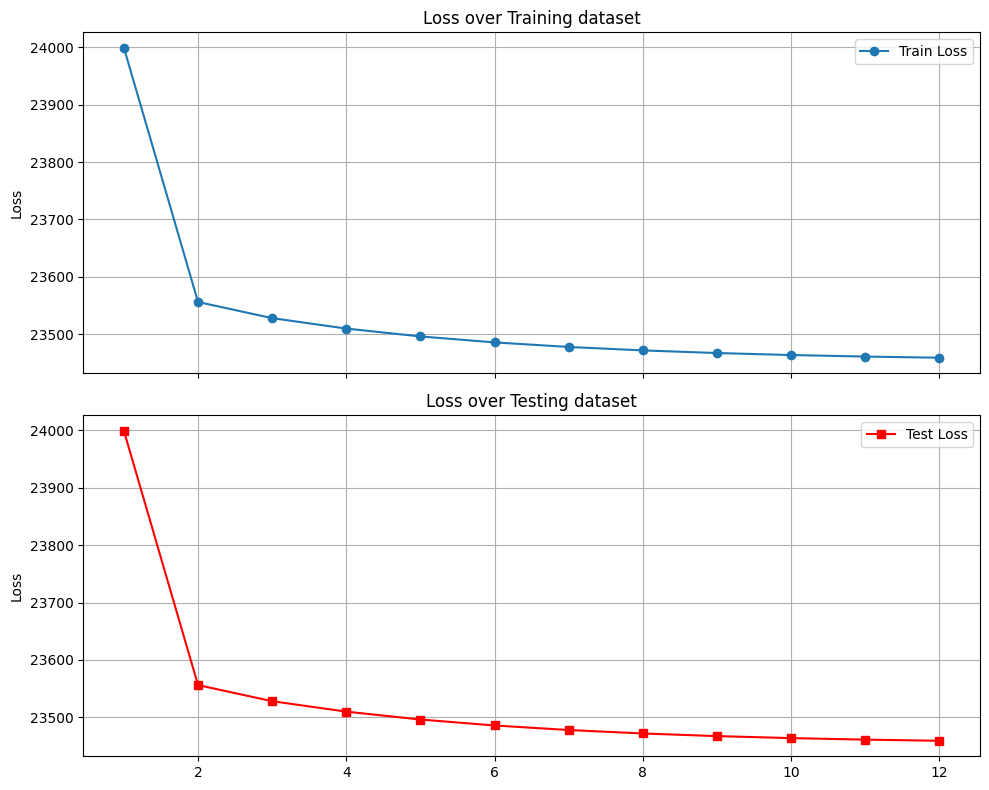

In [ ]:
iterations = range(1, len(loss_history_train) + 1)
iterations1 = range(1, len(loss_history_test) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations, loss_history_train, marker='o', label='Train Loss')
ax1.set_ylabel('Loss')
ax1.set_title('Loss over Training dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations1, loss_history_test, marker='s', color='red', label='Test Loss')
ax2.set_ylabel('Loss')
ax2.set_title('Loss over Testing dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()

## **Train and Test Root Mean Squared Errors over the number of iterations**

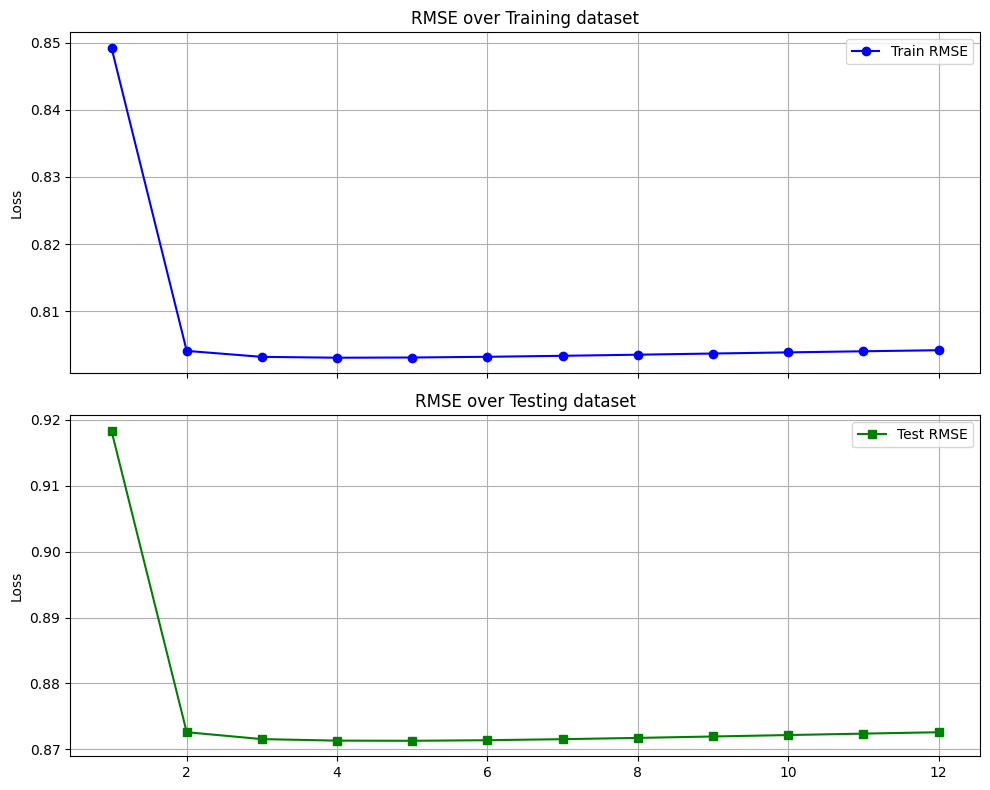

In [ ]:
iterations2 = range(1, len(RMSE_train_history) + 1)
iterations3 = range(1, len(RMSE_test_history) + 1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Plot Loss
ax1.plot(iterations2, RMSE_train_history, marker='o', color='blue', label='Train RMSE')
ax1.set_ylabel('Loss')
ax1.set_title('RMSE over Training dataset')
ax1.legend()
ax1.grid(True)

ax2.plot(iterations3, RMSE_test_history, marker='s', color='green', label='Test RMSE')
ax2.set_ylabel('Loss')
ax2.set_title('RMSE over Testing dataset')
ax2.legend()
ax2.grid(True)
plt.tight_layout()
plt.show()